In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [6]:
data = pd.read_csv('telecom.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
data.shape

(3333, 20)

In [8]:
df = pd.DataFrame(data)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [11]:
num_columns = df.select_dtypes(include='number')

In [12]:
num_columns.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


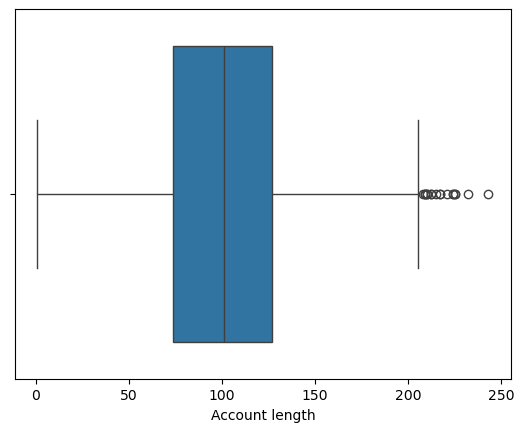

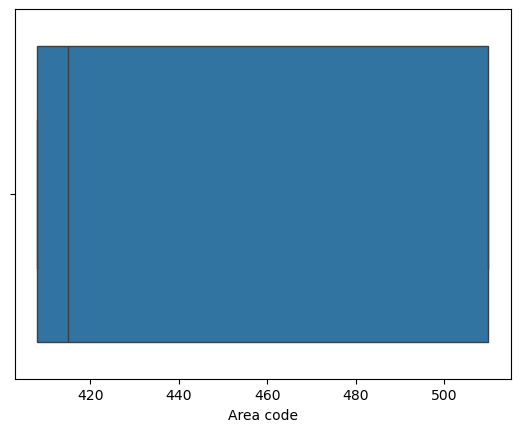

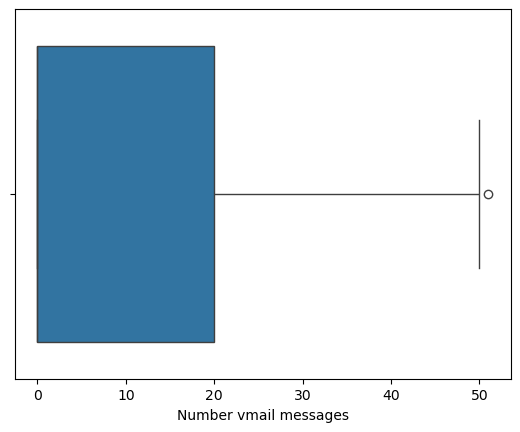

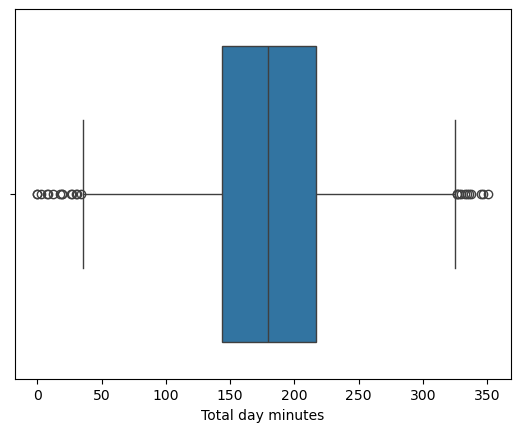

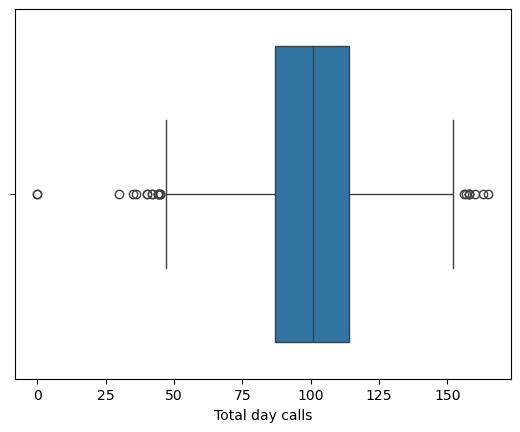

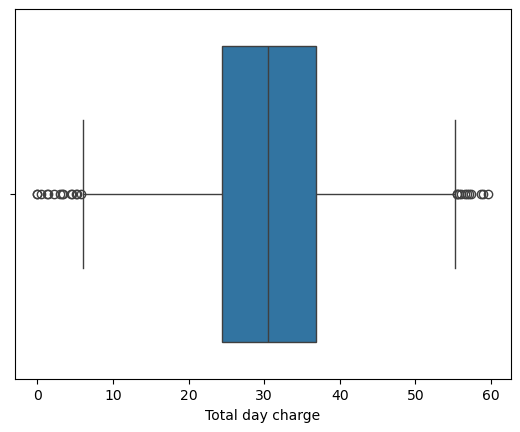

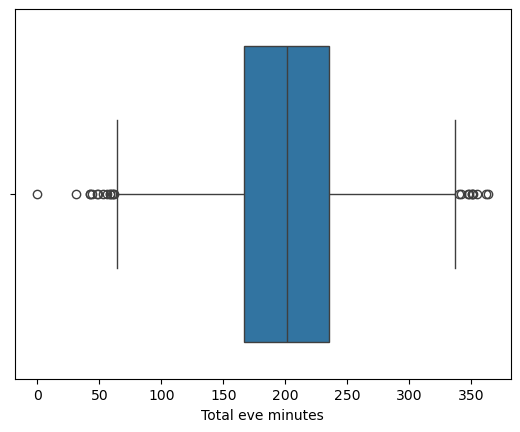

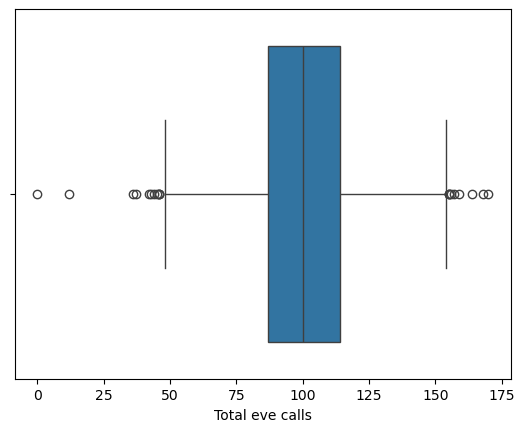

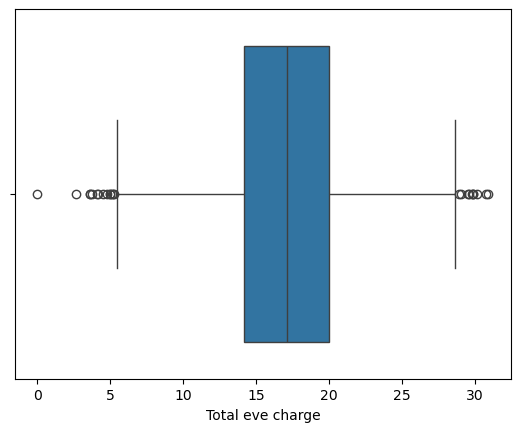

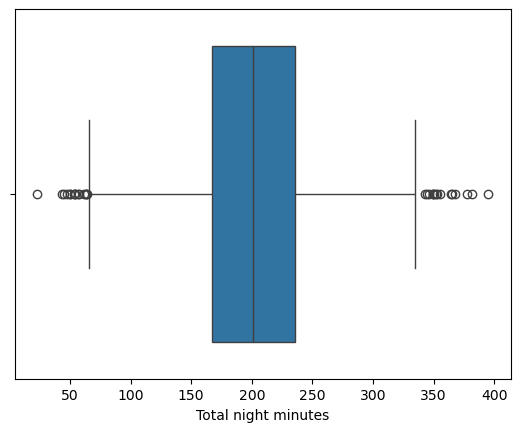

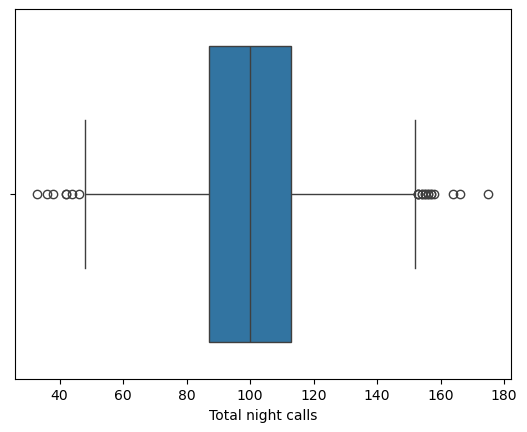

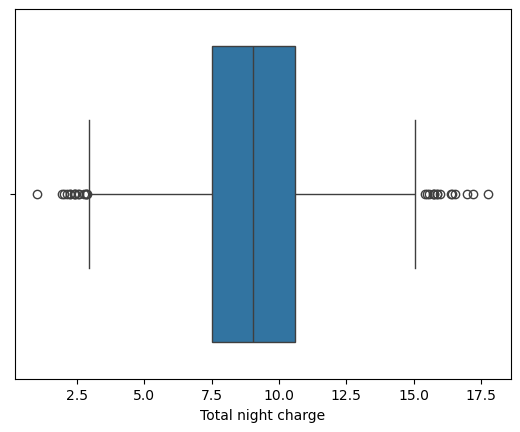

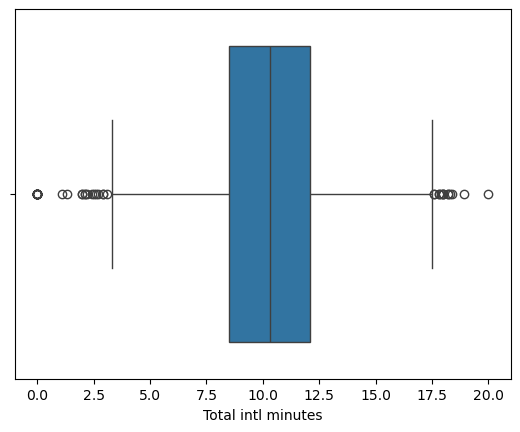

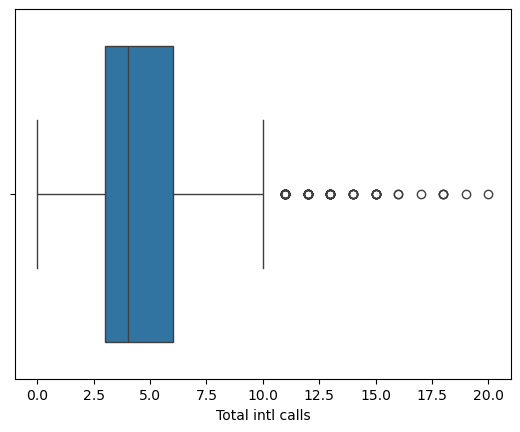

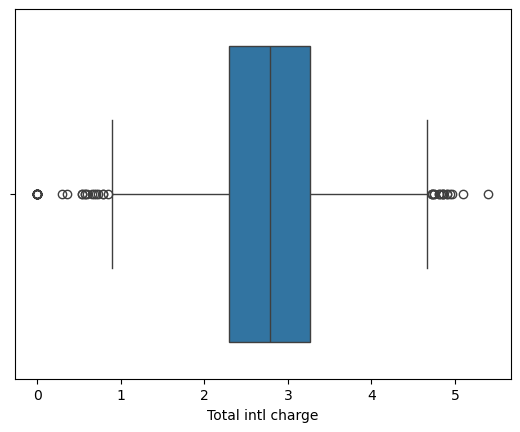

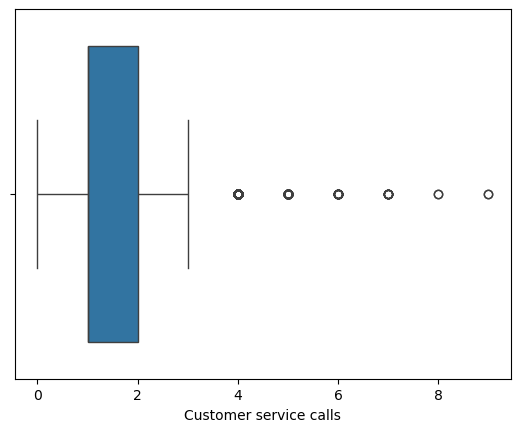

In [13]:
for column in num_columns.columns:
    sns.boxplot(data = num_columns,x = column)
    plt.show()

In [14]:
def handling_outliers(df):
    for col in df.select_dtypes(include = 'number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #removing 
        df[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)
    return df

In [15]:
df1 = handling_outliers(df)
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.40,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.50,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.20,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,63.55,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.30,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


<Axes: >

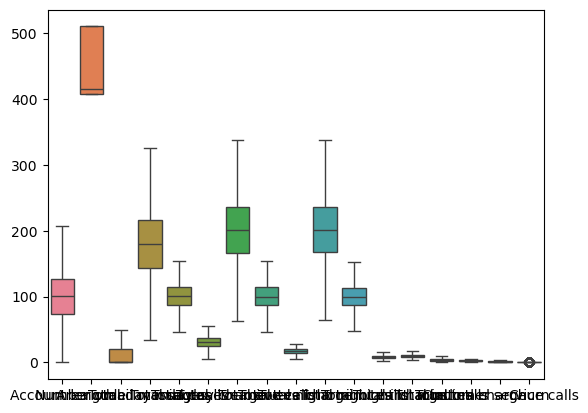

In [16]:
sns.boxplot(df1)

In [17]:
numerical_col = df1.select_dtypes(include= 'number').columns

In [18]:
pt = PowerTransformer(method='yeo-johnson')
df1[numerical_col] = pt.fit_transform(df1[numerical_col])
print(df1[numerical_col].skew())

Account length           -0.055285
Area code                 0.000000
Number vmail messages     1.000225
Total day minutes        -0.022489
Total day calls          -0.013154
Total day charge         -0.021169
Total eve minutes        -0.012889
Total eve calls          -0.009082
Total eve charge         -0.011869
Total night minutes      -0.014952
Total night calls        -0.015519
Total night charge       -0.012962
Total intl minutes       -0.014003
Total intl calls         -0.004706
Total intl charge        -0.009474
Customer service calls   -0.071923
dtype: float64


In [19]:
le = LabelEncoder()

In [20]:
df1['Churn']= le.fit_transform(df['Churn'])
df.Churn.unique()

array([0, 1], dtype=int64)

In [21]:
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,0.687755,-2.775558e-17,No,Yes,1.608481,1.572230,0.476251,1.572849,-0.070718,-0.058250,-0.070708,0.875486,-0.462112,0.874790,-0.106563,-0.545566,-0.107960,-0.308900,0
1,OH,0.169932,-2.775558e-17,No,Yes,1.612571,-0.334592,1.136382,-0.335097,-0.108418,0.144273,-0.108059,1.069084,0.155760,1.070068,1.276723,-0.545566,1.277853,-0.308900,0
2,NJ,0.907133,-2.775558e-17,No,No,-0.618292,1.173304,0.678973,1.173596,-1.584979,0.498845,-1.585251,-0.762912,0.207016,-0.761852,0.711084,0.399414,0.704346,-1.503171,0
3,OH,-0.408542,-2.775558e-17,Yes,No,-0.618292,2.202026,-1.478646,2.202965,-2.734973,-0.614831,-2.733912,-0.078463,-0.565621,-0.079051,-1.336427,1.131579,-1.339216,0.568143,0
4,OK,-0.638822,-2.775558e-17,Yes,No,-0.618292,-0.240357,0.628259,-0.240538,-1.045850,1.107113,-1.044871,-0.278018,1.073414,-0.278610,-0.069733,-0.545566,-0.067052,1.287067,0


In [22]:
df1 = df1.drop(columns = 'State')

In [23]:
categorical_col = df1.select_dtypes(include= ['object']).columns

In [24]:
categorical_col

Index(['International plan', 'Voice mail plan'], dtype='object')

In [25]:
df1['International plan'] = le.fit_transform(df['International plan'])
df1['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df1.head() 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.687755,-2.775558e-17,0,1,1.608481,1.572230,0.476251,1.572849,-0.070718,-0.058250,-0.070708,0.875486,-0.462112,0.874790,-0.106563,-0.545566,-0.107960,-0.308900,0
1,0.169932,-2.775558e-17,0,1,1.612571,-0.334592,1.136382,-0.335097,-0.108418,0.144273,-0.108059,1.069084,0.155760,1.070068,1.276723,-0.545566,1.277853,-0.308900,0
2,0.907133,-2.775558e-17,0,0,-0.618292,1.173304,0.678973,1.173596,-1.584979,0.498845,-1.585251,-0.762912,0.207016,-0.761852,0.711084,0.399414,0.704346,-1.503171,0
3,-0.408542,-2.775558e-17,1,0,-0.618292,2.202026,-1.478646,2.202965,-2.734973,-0.614831,-2.733912,-0.078463,-0.565621,-0.079051,-1.336427,1.131579,-1.339216,0.568143,0
4,-0.638822,-2.775558e-17,1,0,-0.618292,-0.240357,0.628259,-0.240538,-1.045850,1.107113,-1.044871,-0.278018,1.073414,-0.278610,-0.069733,-0.545566,-0.067052,1.287067,0


In [26]:
Ss = StandardScaler()



In [27]:
X = df1.drop(columns= 'Churn', axis= 1)
y = df1['Churn']

In [28]:
selecter = SelectKBest(score_func= f_classif, k=14)
X_new = selecter.fit_transform(X,y)

In [29]:
selected_features = X.columns[selecter.get_support()]
feature_score = pd.DataFrame({'features':X.columns,'score':selecter.scores_}).sort_values(by = 'score',ascending= False)

In [30]:
feature_score

,features,score
2,International plan,241.206004
7,Total day charge,145.019469
5,Total day minutes,144.911328
17,Customer service calls,56.777492
3,Voice mail plan,35.122944
4,Number vmail messages,34.776639
8,Total eve minutes,28.482051
10,Total eve charge,28.480590
16,Total intl charge,14.979621
14,Total intl minutes,14.962946


In [31]:
print(selected_features)

Index(['International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Total night minutes',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')


In [32]:
X_selected = X[selected_features] 

In [33]:
X_selected.columns

Index(['International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Total night minutes',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

## Creating a pipeline for data preprocessing

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No initialization parameters needed

    def fit(self, X, y=None):
        # No fitting logic needed for this transformer
        return self

    def transform(self, X):
        # Apply the outlier handling logic to the DataFrame
        X = handling_outliers(X.copy())  # Ensure a copy to avoid modifying the original
        return X

In [36]:
num_transformer = Pipeline(steps=[
    ('outlier',OutlierHandler()),
    ('power',PowerTransformer(method='yeo-johnson')),
    ('scaler',StandardScaler())
])

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size= 0.20,random_state=42)

In [38]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (2666, 14)
X test shape : (667, 14) 
Y train shape : (2666,)
y test shape : (667,)



In [39]:
X_test_scaled = Ss.fit_transform(X_test)
X_train_scaled = Ss.fit_transform(X_train)

In [40]:
#Model Building

models = {
    'Logistic Regression' : LogisticRegression(),
    'SVC' : SVC(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
}

In [41]:
results  = {}

for model_name,model in models.items():
    model.fit(X_train_scaled,y_train)#training each model
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

In [42]:
results_df = pd.DataFrame(results).T

In [43]:
results_df['Accuracy'].sort_values(ascending=False)

Random Forest               0.946027
Gradient Boosting           0.943028
Decision Tree Classifier    0.929535
SVC                          0.91904
Logistic Regression         0.854573
Name: Accuracy, dtype: object

In [44]:
best_model = RandomForestClassifier(random_state=42,max_depth=5)
best_model.fit(X_train_scaled,y_train)
y_test_prediction = best_model.predict(X_test_scaled)


In [45]:
test_accuracy = accuracy_score(y_test,y_test_prediction)
test_accuracy

0.9175412293853074

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
Pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'mean')),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier())])

In [48]:
Pipeline.fit(X_train_scaled,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [49]:
y_pred = Pipeline.predict(X_test_scaled)

In [50]:
X_train.columns

Index(['International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Total night minutes',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

In [51]:
import joblib

In [52]:
joblib.dump(Pipeline, 'final_pipeline.pkl')
print("Pipeline saved successfully as 'final_pipeline.pkl'")

Pipeline saved successfully as 'final_pipeline.pkl'


In [53]:
loaded_pipeline = joblib.load('final_pipeline.pkl')

In [63]:
Unseen_data = pd.read_csv('Unseen_telephone.csv')
df = pd.DataFrame(Unseen_data)
df.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1
1,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1
2,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0
3,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2
4,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3


In [64]:
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df1.head() 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.687755,-2.775558e-17,0,1,1.608481,1.572230,0.476251,1.572849,-0.070718,-0.058250,-0.070708,0.875486,-0.462112,0.874790,-0.106563,-0.545566,-0.107960,-0.308900,0
1,0.169932,-2.775558e-17,0,1,1.612571,-0.334592,1.136382,-0.335097,-0.108418,0.144273,-0.108059,1.069084,0.155760,1.070068,1.276723,-0.545566,1.277853,-0.308900,0
2,0.907133,-2.775558e-17,0,0,-0.618292,1.173304,0.678973,1.173596,-1.584979,0.498845,-1.585251,-0.762912,0.207016,-0.761852,0.711084,0.399414,0.704346,-1.503171,0
3,-0.408542,-2.775558e-17,1,0,-0.618292,2.202026,-1.478646,2.202965,-2.734973,-0.614831,-2.733912,-0.078463,-0.565621,-0.079051,-1.336427,1.131579,-1.339216,0.568143,0
4,-0.638822,-2.775558e-17,1,0,-0.618292,-0.240357,0.628259,-0.240538,-1.045850,1.107113,-1.044871,-0.278018,1.073414,-0.278610,-0.069733,-0.545566,-0.067052,1.287067,0


In [65]:
num_transformer.fit(df)

Pipeline(steps=[('outlier', OutlierHandler()), ('power', PowerTransformer()),
                ('scaler', StandardScaler())])

In [66]:
df.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1
1,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1
2,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0
3,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2
4,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3


In [67]:
predictions = loaded_pipeline.predict(df)
print(f"Predictions: {predictions}")

Predictions: [0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1]


In [68]:
df['Churn_predicted'] = predictions

In [69]:
df.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_predicted
0,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,1
3,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,1
4,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,1


In [62]:
df.to_csv('Unseen_telephone.csv',index= False)